In [1]:
import hyrax
from astropy.io import fits
import pprint

In [2]:
h = hyrax.Hyrax()
h.config["data_set"]["name"] = "FitsImageDataSet"
h.config["general"]["data_dir"] = "stuff/split_images"

# Location of your catalog file. Any file format supported by astropy.Table will work
h.config["data_set"]["filter_catalog"] = "stuff/catalog.fits"

# Size in pixels to send to ML model. All images must be this size or larger on
# both dimensions
h.config["data_set"]["crop_to"] = (50,50)

# This is good to simply attempt to construct the dataset. Once things are working you might try
# to train or infer
dataset = h.prepare()

[2025-07-14 13:04:21,606 hyrax:INFO] Runtime Config read from: /Users/diegomiura/anaconda3/envs/hyrax_pip/lib/python3.12/site-packages/hyrax/hyrax_default_config.toml
[2025-07-14 13:04:21,621 hyrax.data_sets.fits_image_dataset:INFO] FitsImageDataSet has 50 objects
[2025-07-14 13:04:21,624 hyrax.data_sets.fits_image_dataset:INFO] Preloading FitsImageDataSet cache...
[2025-07-14 13:04:21,624 hyrax.prepare:INFO] Finished Prepare


[2025-07-14 13:04:21,710 hyrax.data_sets.fits_image_dataset:INFO] Processed 49 objects


In [3]:
h.train()

[2025-07-14 13:04:22,671 hyrax.data_sets.fits_image_dataset:INFO] FitsImageDataSet has 50 objects
[2025-07-14 13:04:22,673 hyrax.data_sets.fits_image_dataset:INFO] Preloading FitsImageDataSet cache...
[2025-07-14 13:04:22,776 hyrax.data_sets.fits_image_dataset:INFO] Processed 49 objects
[2025-07-14 13:04:22,788 hyrax.models.model_registry:INFO] Using criterion: torch.nn.CrossEntropyLoss with default arguments.
2025-07-14 13:04:22,804 ignite.distributed.auto.auto_dataloader INFO: Use data loader kwargs for dataset '<hyrax.data_sets.fit': 
	{'sampler': <hyrax.pytorch_ignite.SubsetSequentialSampler object at 0x17f1d99a0>, 'batch_size': 512, 'shuffle': False, 'pin_memory': False}
2025-07-14 13:04:22,805 ignite.distributed.auto.auto_dataloader INFO: Use data loader kwargs for dataset '<hyrax.data_sets.fit': 
	{'sampler': <hyrax.pytorch_ignite.SubsetSequentialSampler object at 0x17f1819d0>, 'batch_size': 512, 'shuffle': False, 'pin_memory': False}
/Users/diegomiura/anaconda3/envs/hyrax_pip/l

100%|##########| 1/1 [00:00<?, ?it/s]

100%|##########| 1/1 [00:00<?, ?it/s]

100%|##########| 1/1 [00:00<?, ?it/s]

100%|##########| 1/1 [00:00<?, ?it/s]

100%|##########| 1/1 [00:00<?, ?it/s]

100%|##########| 1/1 [00:00<?, ?it/s]

100%|##########| 1/1 [00:00<?, ?it/s]

100%|##########| 1/1 [00:00<?, ?it/s]

100%|##########| 1/1 [00:00<?, ?it/s]

100%|##########| 1/1 [00:00<?, ?it/s]

[2025-07-14 13:04:24,300 hyrax.pytorch_ignite:INFO] Total training time: 1.34[s]
[2025-07-14 13:04:24,301 hyrax.pytorch_ignite:INFO] Latest checkpoint saved as: /Users/diegomiura/research/Hyrax-Research/results/20250714-130422-train-ygyr/checkpoint_epoch_10.pt
[2025-07-14 13:04:24,301 hyrax.pytorch_ignite:INFO] Best metric checkpoint saved as: /Users/diegomiura/research/Hyrax-Research/results/20250714-130422-train-ygyr/checkpoint_10_loss=-16.3660.pt
2025/07/14 13:04:24 INFO mlflow.system_metrics.system_metrics_monitor: Stopping system metrics monitoring...
2025/07/14 13:04:24 INFO mlflow.system_metrics.system_metrics_monitor: Successfully terminated system metrics monitoring!
[2025-07-14 13:04:24,324 hyrax.train:INFO] Finished Training
[2025-07-14 13:04:24,491 hyrax.model_exporters:INFO] Exported model to ONNX format: /Users/diegomiura/research/Hyrax-Research/results/20250714-130422-train-ygyr/example_model_opset_20.onnx


In [4]:
h.infer()

[2025-07-14 13:04:26,082 hyrax.data_sets.fits_image_dataset:INFO] FitsImageDataSet has 50 objects
[2025-07-14 13:04:26,090 hyrax.data_sets.fits_image_dataset:INFO] Preloading FitsImageDataSet cache...
[2025-07-14 13:04:26,207 hyrax.data_sets.fits_image_dataset:INFO] Processed 49 objects
[2025-07-14 13:04:26,225 hyrax.models.model_registry:INFO] Using criterion: torch.nn.CrossEntropyLoss with default arguments.
[2025-07-14 13:04:26,225 hyrax.verbs.infer:INFO] data set has length 50
2025-07-14 13:04:26,228 ignite.distributed.auto.auto_dataloader INFO: Use data loader kwargs for dataset '<hyrax.data_sets.fit': 
	{'sampler': None, 'batch_size': 512, 'shuffle': False, 'pin_memory': False}
[2025-07-14 13:04:26,253 hyrax.verbs.infer:INFO] Saving inference results at: /Users/diegomiura/research/Hyrax-Research/results/20250714-130426-infer-oeB7
[2025-07-14 13:04:26,488 hyrax.pytorch_ignite:INFO] Evaluating model on device: mps
[2025-07-14 13:04:26,490 hyrax.pytorch_ignite:INFO] Total epochs: 1


100%|##########| 1/1 [00:00<?, ?it/s]

[2025-07-14 13:04:26,544 hyrax.pytorch_ignite:INFO] Total evaluation time: 0.06[s]
[2025-07-14 13:04:26,604 hyrax.verbs.infer:INFO] Inference Complete.
[2025-07-14 13:04:26,623 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.
[2025-07-14 13:04:26,623 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.
[2025-07-14 13:04:29,719 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.
[2025-07-14 13:04:29,724 hyrax.data_sets.fits_image_dataset:INFO] FitsImageDataSet has 50 objects


In [20]:
h.umap()

[2025-07-14 22:27:23,148 hyrax.data_sets.inference_dataset:INFO] Using most recent results dir /Users/diegomiura/research/Hyrax-Research/results/20250714-130426-infer-oeB7 for lookup. Use the [results] inference_dir config to set a directory or pass it to this verb.
[2025-07-14 22:27:23,180 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.
[2025-07-14 22:27:23,180 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.
[2025-07-14 22:27:23,181 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.
[2025-07-14 22:27:23,188 hyrax.data_sets.fits_image_dataset:INFO] FitsImageDataSet has 50 objects
[2025-07-14 22:27:23,189 hyrax.verbs.umap:INFO] Saving UMAP results to /Users/diegomiura/research/Hyrax-Research/results/20250714-222723-umap-G3mD
[2025-07-14 22:27:23,304 hyrax.verbs.umap:INFO] Fitting the UMAP
[2025-07-14 22:27:23,383 hyrax.verbs.umap:INFO] Saving fitted UMAP Reducer


Creating lower dimensional representation using UMAP::   0%|          | 0/1 [00:00<?, ?it/s]

[2025-07-14 22:27:23,684 hyrax.verbs.umap:INFO] Finished transforming all data through UMAP
[2025-07-14 22:27:23,703 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.
[2025-07-14 22:27:23,703 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.
[2025-07-14 22:27:23,704 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.
[2025-07-14 22:27:23,710 hyrax.data_sets.fits_image_dataset:INFO] FitsImageDataSet has 50 objects


In [21]:
h.config["visualize"]["display_images"] = True

[2025-07-14 22:27:24,878 hyrax.data_sets.inference_dataset:INFO] Using most recent results dir /Users/diegomiura/research/Hyrax-Research/results/20250714-222723-umap-G3mD for lookup. Use the [results] inference_dir config to set a directory or pass it to this verb.
[2025-07-14 22:27:24,914 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.
[2025-07-14 22:27:24,915 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.
[2025-07-14 22:27:24,915 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.
[2025-07-14 22:27:24,922 hyrax.data_sets.fits_image_dataset:INFO] FitsImageDataSet has 50 objects


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
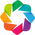

BokehModel(combine_events=True, render_bundle={'docs_json': {'71406c70-d9cd-4548-ba2e-06289496c5ab': {'version…

In [22]:
h.visualize()

In [9]:
h.index()

[2025-07-11 20:29:03,446 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.
[2025-07-11 20:29:03,446 hyrax.config_utils:WARNING] Cannot find default_config.toml for torch.
[2025-07-11 20:29:03,447 hyrax.config_utils:WARNING] Cannot find default_config.toml for umap.
[2025-07-11 20:29:03,453 hyrax.data_sets.fits_image_dataset:INFO] FitsImageDataSet has 50 objects
[2025-07-11 20:29:03,894 hyrax.verbs.vdb_index:INFO] Number of inference result batches to index: 1.
100%|██████████| 1/1 [00:00<00:00, 81.14it/s]


In [10]:
all_ids = list(dataset.ids())
all_ids

['72000000',
 '72000001',
 '72000002',
 '72000003',
 '72000004',
 '72000005',
 '72000006',
 '72000007',
 '72000008',
 '72000009',
 '72000010',
 '72000011',
 '72000012',
 '72000013',
 '72000014',
 '72000015',
 '72000016',
 '72000017',
 '72000018',
 '72000019',
 '72000020',
 '72000021',
 '72000022',
 '72000023',
 '72000027',
 '72000028',
 '72000030',
 '72000031',
 '72000032',
 '72000033',
 '72000034',
 '72000035',
 '72000037',
 '72000038',
 '72000039',
 '72000041',
 '72000042',
 '72000043',
 '72000044',
 '72000045',
 '72000046',
 '72000047',
 '72000048',
 '72000049',
 '72000050',
 '72000051',
 '72000052',
 '72000053',
 '72000054',
 '72000055']

In [11]:
from hyrax.vector_dbs import ChromaDB
from hyrax.config_utils import find_most_recent_results_dir

context = {"results_dir": find_most_recent_results_dir(h.config, "index")}
db = ChromaDB({}, context)

In [14]:
search_object_id = '72000011'
search_results = db.search_by_id(search_object_id, k=5)
print(search_results)

{0: ['72000011', '72000014', '72000016', '72000013', '72000017']}


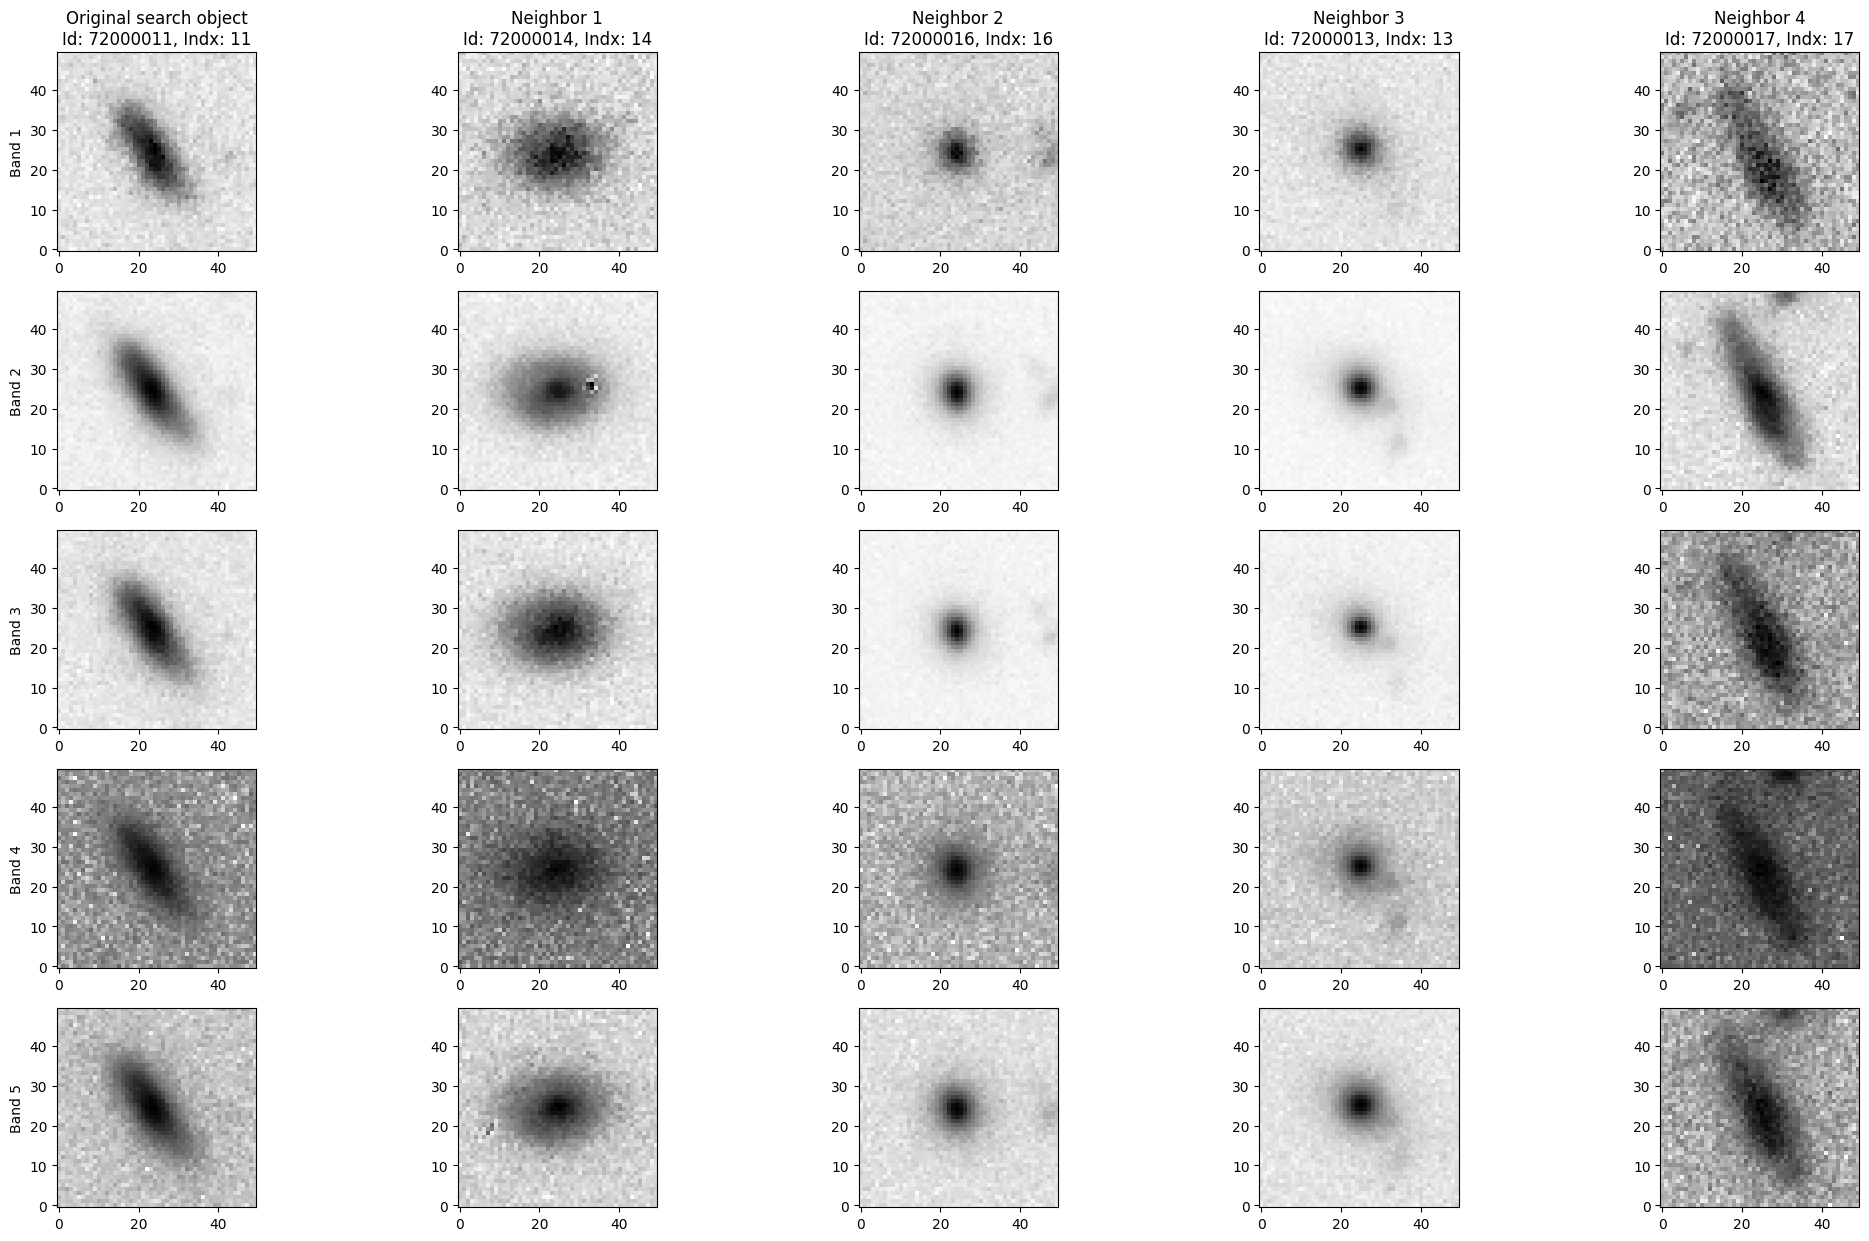

In [20]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

fig, axes = plt.subplots(5, 5, figsize=(25, 5 * 3))

for ni, r in enumerate(search_results[0]):
    indx = all_ids.index(r)  # Get the index of the object in the dataset
    data = dataset[indx].numpy()  # Retrieve the data for the object - a (3, 96, 96) numpy array
    data = (data - np.min(data)) / (np.max(data) - np.min(data))  # Normalize the data

    for i in range(5):
        axes[i, ni].imshow(data[i], origin="lower", norm=LogNorm(), cmap="Greys")

        if i == 0:
            if ni == 0:
                axes[i, ni].set_title(f"Original search object\nId: {search_object_id}, Indx: {indx}")
            else:
                axes[i, ni].set_title(f"Neighbor {ni}\nId: {r}, Indx: {indx}")

        if ni == 0:
            axes[i, ni].set_ylabel(f"Band {i + 1}")

In [12]:
dir(dataset)

['__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_all_files',
 '_before_preload',
 '_called_from_test',
 '_check_object_id_to_tensor_cache',
 '_config',
 '_convert_to_torch',
 '_determine_numprocs_preload',
 '_file_to_path',
 '_filter_filename',
 '_get_file',
 '_get_np_function',
 '_init_from_path',
 '_lazy_map_executor',
 '_log_duration_tensorboard',
 '_metadata_table',
 '_object_files',
 '_object_id_to_tensor',
 '_parse_filter_catalog',
 '_populate_object_id_to_tensor_cache',
 '_preload_tensor_cache',
 '_prepare_met

In [3]:
test_image = fits.open('stuff/split_images/72_3_Z_v2_hsc_realistic.fits')
test_image.info()

Filename: stuff/split_images/72_3_Z_v2_hsc_realistic.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  SUBARU_HSC.Z    1 PrimaryHDU      41   (53, 53)   float64   


In [4]:
import os

for file in os.listdir('stuff/split_images'):
    file_path = os.path.join('stuff/split_images', file)
    if file_path.endswith('.fits'):
        with fits.open(file_path) as hdul:
            print(f'File: {file_path} ------------- {hdul[0].data.shape}')
            #pprint.pprint(hdul.info())
            # print('Header:')
            # pprint.pprint(hdul[0].header)
            # print('Data shape:', hdul[0].data.shape)
            print('\n')

File: stuff/split_images/72_1_Z_v2_hsc_realistic.fits ------------- (411, 411)


File: stuff/split_images/72_0_Y_v2_hsc_realistic.fits ------------- (537, 537)


File: stuff/split_images/72_1_R_v2_hsc_realistic.fits ------------- (411, 411)


File: stuff/split_images/72_1_I_v2_hsc_realistic.fits ------------- (411, 411)


File: stuff/split_images/72_4_Y_v2_hsc_realistic.fits ------------- (178, 178)


File: stuff/split_images/72_2_G_v2_hsc_realistic.fits ------------- (195, 195)


File: stuff/split_images/72_1_G_v2_hsc_realistic.fits ------------- (411, 411)


File: stuff/split_images/72_2_I_v2_hsc_realistic.fits ------------- (195, 195)


File: stuff/split_images/72_2_R_v2_hsc_realistic.fits ------------- (195, 195)


File: stuff/split_images/72_3_Y_v2_hsc_realistic.fits ------------- (53, 53)


File: stuff/split_images/72_2_Z_v2_hsc_realistic.fits ------------- (195, 195)


File: stuff/split_images/72_3_G_v2_hsc_realistic.fits ------------- (53, 53)


File: stuff/split_images/72_4_R_